## IMPORTING MODELS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import VarianceThreshold

In [2]:
metadata = pd.read_csv("/Users/zee/Dev/Project-I:IT/MiniProject/Project1/metadata.csv").dropna()
metadata

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
1688,10356_1#1,1998.0,Brasil,America,S,0.032,0.002,0.002,0.016,0.5,...,-8.965784,-5.965784,-1.000000,-3.000000,0.0,0.0,0.0,0.0,0.0,0.0
1689,10356_1#10,2008.0,Brasil,America,S,0.125,0.19,0.012,0.016,24,...,-6.380822,-5.965784,4.584963,-3.000000,0.0,0.0,0.0,0.0,1.0,0.0
1690,10356_1#11,2008.0,Chile,America,S,0.75,6,0.023,0.016,1,...,-5.442222,-5.965784,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
1691,10356_1#12,2008.0,Ecuador,America,R,0.064,0.006,0.006,0.016,12,...,-7.380822,-5.965784,3.584963,0.584963,0.0,0.0,0.0,0.0,1.0,1.0
1692,10356_1#15,1998.0,USA,America,S,0.125,32,0.004,0.016,1.5,...,-7.965784,-5.965784,0.584963,-1.000000,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,SRR5827366,2015.0,New_Zealand,Oceania,0,0.25,0.004,0.004,0.008,0.25,...,-7.965784,-6.965784,-2.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0
3681,SRR5827371,2015.0,New_Zealand,Oceania,0,0.12,0.002,0.004,0.008,0.25,...,-7.965784,-6.965784,-2.000000,-2.000000,0.0,0.0,0.0,0.0,0.0,0.0
3682,SRR5827372,2015.0,New_Zealand,Oceania,0,0.5,0.004,0.008,0.016,1,...,-6.965784,-5.965784,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0
3683,SRR5827369,2015.0,New_Zealand,Oceania,0,0.5,8,0.06,0.06,2,...,-4.058894,-4.058894,1.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0


In [3]:
metadata.columns

Index(['Sample_ID', 'Year', 'Country', 'Continent', 'Beta.lactamase',
       'Azithromycin', 'Ciprofloxacin', 'Ceftriaxone', 'Cefixime',
       'Tetracycline', 'Penicillin', 'NG_MAST', 'Group', 'azm_mic', 'cip_mic',
       'cro_mic', 'cfx_mic', 'tet_mic', 'pen_mic', 'log2_azm_mic',
       'log2_cip_mic', 'log2_cro_mic', 'log2_cfx_mic', 'log2_tet_mic',
       'log2_pen_mic', 'azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', 'tet_sr',
       'pen_sr'],
      dtype='object')

In [4]:
Y_raw = metadata[['Sample_ID', 'azm_sr', 'cip_sr', 'cfx_sr']]
Y_raw

,Sample_ID,azm_sr,cip_sr,cfx_sr
1688,10356_1#1,0.0,0.0,0.0
1689,10356_1#10,0.0,0.0,0.0
1690,10356_1#11,0.0,1.0,0.0
1691,10356_1#12,0.0,0.0,0.0
1692,10356_1#15,0.0,1.0,0.0
...,...,...,...,...
3680,SRR5827366,0.0,0.0,0.0
3681,SRR5827371,0.0,0.0,0.0
3682,SRR5827372,0.0,0.0,0.0
3683,SRR5827369,0.0,1.0,0.0


In [5]:
azm_sr = pd.read_csv( "/Users/zee/Dev/Project-I:IT/MiniProject/Project1/azm_sr_gwas_filtered_unitigs.Rtab", sep=" ", index_col=0).transpose()
azm_sr

pattern_id,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,TATATAAGGGGTTGCCGTTCCGCAGTTGGGCGGCAGCATAC,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
ERR1549286,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549290,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549291,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549287,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR1549288,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR2172350,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR2172351,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR2172352,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ERR2172353,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [6]:
Xy = pd.merge(azm_sr, Y_raw[['Sample_ID', 'azm_sr']], right_on=['Sample_ID'], left_index=True).drop(['Sample_ID'], axis=1).dropna()
Xy

,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,TATATAAGGGGTTGCCGTTCCGCAGTTGGGCGGCAGCATAC,...,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG,azm_sr
1688,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
1689,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
1690,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
1691,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
1692,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
3681,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
3682,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0
3683,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0.0


In [7]:
X = Xy.drop(['azm_sr'], axis=1)
y = Xy[['azm_sr']]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [8]:
selector = VarianceThreshold()
X = selector.fit_transform(X)

## MODEL

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=32)

In [10]:
input_dim = X_train.shape[1]
output_dim = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_dim=input_dim),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=output_dim, activation='sigmoid')
])
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=7, batch_size=32, validation_split=0.2)


Epoch 1/7
36/36 [==============================] - 0s 3ms/step - loss: 0.5677 - accuracy: 0.7596 - val_loss: 0.3927 - val_accuracy: 0.8750
Epoch 2/7
36/36 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8720 - val_loss: 0.2469 - val_accuracy: 0.8889
Epoch 3/7
36/36 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.8981 - val_loss: 0.1902 - val_accuracy: 0.9306
Epoch 4/7
36/36 [==============================] - 0s 945us/step - loss: 0.1630 - accuracy: 0.9512 - val_loss: 0.1557 - val_accuracy: 0.9583
Epoch 5/7
36/36 [==============================] - 0s 838us/step - loss: 0.1200 - accuracy: 0.9765 - val_loss: 0.1160 - val_accuracy: 0.9722
Epoch 6/7
36/36 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9817 - val_loss: 0.1096 - val_accuracy: 0.9757
Epoch 7/7
36/36 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9861 - val_loss: 0.0855 - val_accuracy: 0.9861


In [11]:
model.evaluate(X_train, Y_train)

45/45 [==============================] - 0s 507us/step - loss: 0.0688 - accuracy: 0.9861


[0.06883388012647629, 0.9860724210739136]

In [12]:
def plot_matrix(model, X, y, threshold=0.5):
    predicted = tf.squeeze(model.predict(X))
    predicted = np.array([1 if x >= threshold else 0 for x in predicted])
    actual = np.array(y)
    conf_mat = confusion_matrix(actual, predicted)
    displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    displ.plot()

45/45 [==============================] - 0s 484us/step


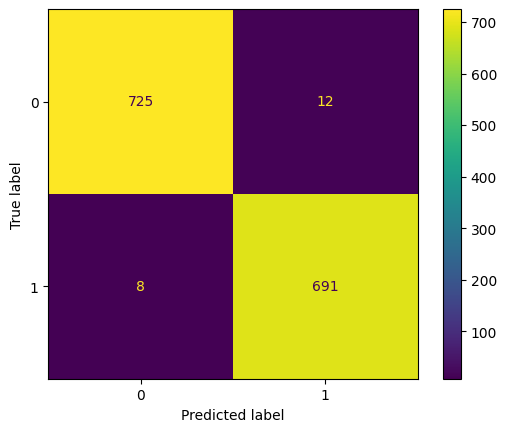

In [13]:
plot_matrix(model, X_train, Y_train)

In [14]:
model.evaluate(X_test,Y_test)

20/20 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9870


[0.07237552851438522, 0.9870129823684692]

20/20 [==============================] - 0s 410us/step


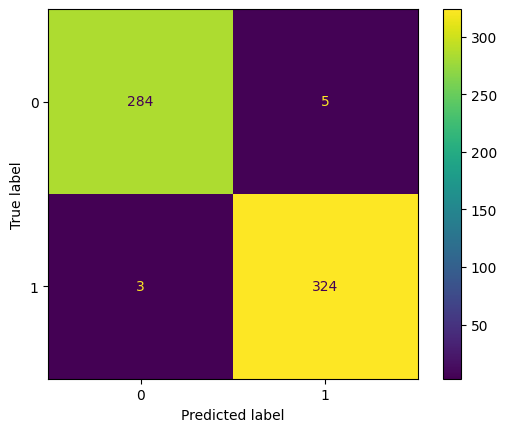

In [15]:
plot_matrix(model, X_test, Y_test)